In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [3]:
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]
print(data_raw.info())
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
143,144,0,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.750,NaN,Q
238,239,0,2,"Pengelly, Mr. Frederick William",male,19.0,0,0,28665,10.500,NaN,S
766,767,0,1,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.600,NaN,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050,NaN,S
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.900,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.550,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.050,NaN,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.250,NaN,Q


### 4C's of Data Cleaning: Correcting, Completing, Creating, Converting

In [4]:
print('Train columns with null values: \n', data1.isnull().sum())   #sum up the null values
print('-' * 30)
print('Test columns with null values: \n', data_val.isnull().sum())
print('-' * 30)

data_raw.describe(include = 'all')   #return the descrition of train data about mean, max, min, ect

Train columns with null values: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
------------------------------
Test columns with null values: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
------------------------------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Petroff, Mr. Nedelio",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Clean Data

In [5]:
for dataset in data_cleaner:      #where data_cleaner=[data1, data_val]
    #complete missing values with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)   #mode 众数
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature and others previously stated to exclude in train dataset
drop_columns = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_columns, axis = 1, inplace = True)

print(data1.isnull().sum())
print('-' * 30)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
------------------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
#create new feature for train and test dataset
for dataset in data_cleaner:
    dataset['Familysize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Isalone'] = 1
    dataset.Isalone.loc[dataset.Familysize > 1] = 0
    
    dataset['Title'] = dataset.Name.str.split(',', expand = True)[1].str.split('.', expand = True)[0]
    
    dataset['FareBin'] = pd.qcut(dataset.Fare, 4)  #将票价分成4个范围
    dataset['AgeBin'] = pd.cut(dataset.Age.astype(int), 5)
    
stat_min = 10
title_name = data1.Title.value_counts() < 10
data1.Title = data1.Title.apply(lambda x: 'Misc' if title_name.loc[x] == True else x)
print(data1.Title.value_counts())
print('-' * 30) 

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
------------------------------


C:\Users\control\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Convert Formats

In [7]:
#generate labels for each classes
label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset.Sex)
    dataset['Embarked_Code'] = label.fit_transform(dataset.Embarked)
    dataset['Title_Code'] = label.fit_transform(dataset.Title)
    dataset['AgeBin_Code'] = label.fit_transform(dataset.AgeBin)
    dataset['FareBin_Code'] = label.fit_transform(dataset.FareBin)
    
Target = ['Survived']

data1_x = ['Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'Familysize', 'Isalone']
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x
print('Original X Y:', data1_xy, '\n')

data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'Familysize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')

data1_dummy = pd.get_dummies(data1[data1_x]) #在只会将str型的values进行one hot encode
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y:', data1_xy_dummy, '\n')

data1_dummy.head()

Original X Y: ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'Familysize', 'Isalone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'Familysize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y: ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'Familysize', 'Isalone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



,Pclass,SibSp,Parch,Age,Fare,Familysize,Isalone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


#### Split Training and Testing Data

In [8]:
#划分训练集和测试集，括号里有两个array所以返回4个值train1_x, test1_x, train1_y,test1_y
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0) 
print('Data1 Shape: {}'.format(data1.shape))
print('Train1 Shape: {}'.format(train1_x.shape))
print('Test1 Shape: {}'.format(test1_x.shape))

train1_x.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,SibSp,Parch,Age,Fare
105,1,3,2,2,0,0,28.0,7.8958
68,0,3,2,1,4,2,17.0,7.9250
253,1,3,2,2,1,0,30.0,16.1000
320,1,3,2,2,0,0,22.0,7.2500
706,0,2,2,3,0,0,45.0,13.5000


#### Perform Exploratory Analysis with Statistics

In [9]:
#Discrete Variable correlation by Survival using
for x in data1_x:
    if data1[x].dtype != 'float64':   #age和fare个数太多，没有实际意义，这里不加入分析
        
        print('Survival Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index = False).mean()) #as_index = False 新产生的dataframe的index为0,1,2 不再是原来的index
        print('-' * 30)
        
print(pd.crosstab(data1.Title, data1.Survived))

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
------------------------------
Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
------------------------------
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
------------------------------
Survival Correlation by: Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
------------------------------
Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
------------------------------
Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---

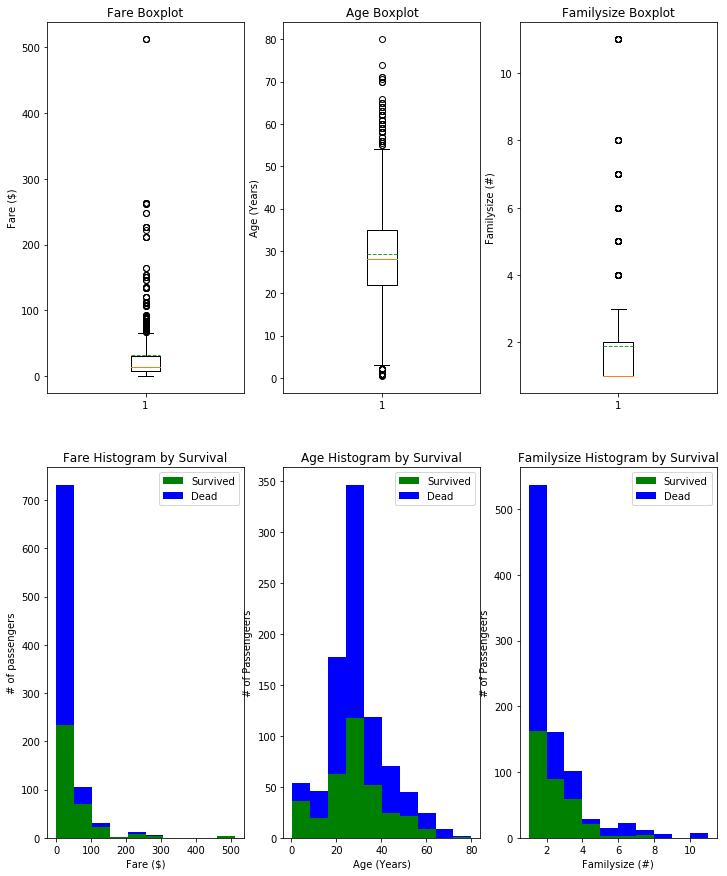

In [10]:
plt.figure(figsize = [12, 15])

plt.subplot(231)
plt.boxplot(x = data1['Fare'], showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(x = data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(x = data1.Familysize, showmeans = True, meanline = True)
plt.title('Familysize Boxplot')
plt.ylabel('Familysize (#)')

plt.subplot(234)
plt.hist(x = [data1[data1.Survived == 1].Fare, data1[data1.Survived == 0].Fare],
        stacked = True, color = ['g', 'b'], label = ['Survived', 'Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of passengers')
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1.Survived == 1].Age, data1[data1.Survived == 0].Age],
        stacked = True, color = ['g', 'b'], label = ['Survived', 'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengeers')
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1.Survived == 1].Familysize, data1[data1.Survived == 0].Familysize],
        stacked = True, color = ['g', 'b'], label = ['Survived', 'Dead'] )
plt.title('Familysize Histogram by Survival')
plt.xlabel('Familysize (#)')
plt.ylabel('# of Passengeers')
plt.legend()

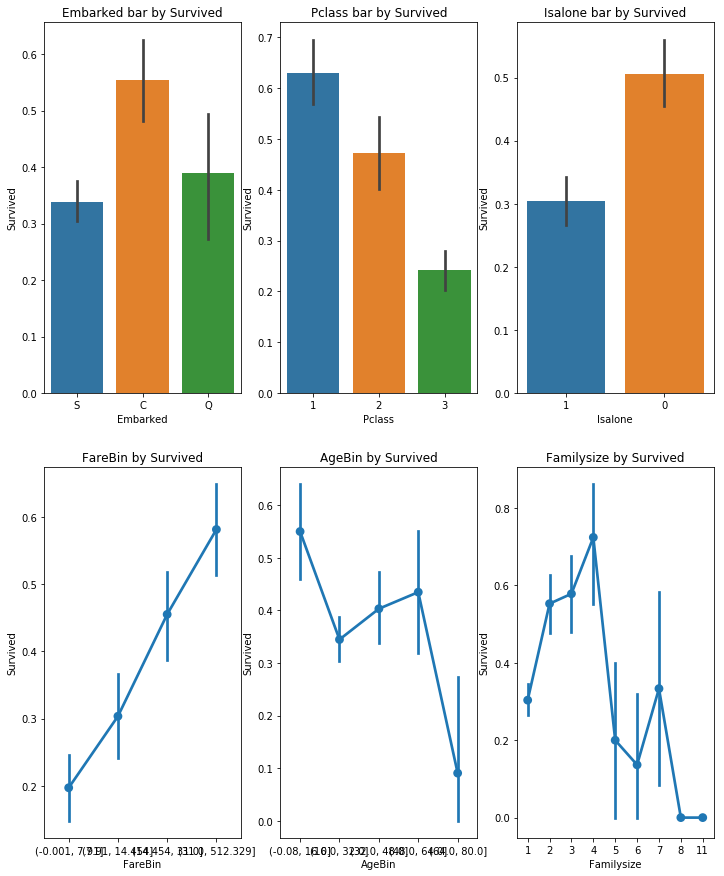

In [198]:
#一次性生成2*3个子图
fig, saxis = plt.subplots(2, 3, figsize = (12, 15))  

#order按指定顺序排列，取列里面的values
sns.barplot(x = 'Embarked', y = 'Survived', data = data1, ax = saxis[0, 0])
saxis[0,0].set_title('Embarked bar by Survived')
sns.barplot(x = 'Pclass', y = 'Survived', order = [1, 2, 3], data = data1, ax = saxis[0, 1])
saxis[0,1].set_title('Pclass bar by Survived')
sns.barplot(x = 'Isalone', y = 'Survived', order = [1, 0], data = data1, ax = saxis[0, 2]) 
saxis[0,2].set_title('Isalone bar by Survived')

sns.pointplot(x = 'FareBin', y = 'Survived', data = data1, ax = saxis[1, 0])
saxis[1,0].set_title('FareBin by Survived')
sns.pointplot(x = 'AgeBin', y = 'Survived', data = data1, ax = saxis[1, 1])
saxis[1,1].set_title('AgeBin by Survived')
sns.pointplot(x = 'Familysize', y = 'Survived', data = data1, ax = saxis[1, 2])
saxis[1,2].set_title('Familysize by Survived')

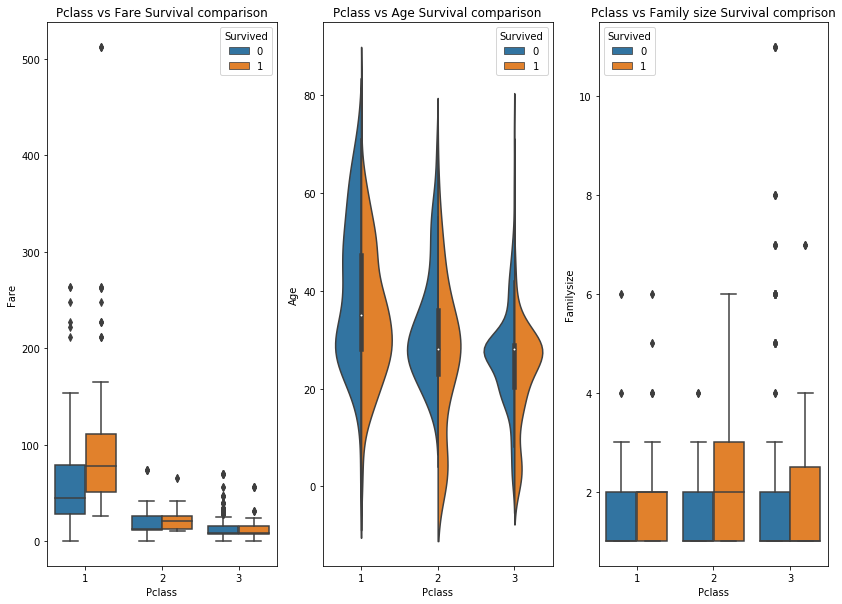

In [205]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize = (12, 10))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = data1, ax = axis1) #hue按照列名的值进行分类
axis1.set_title('Pclass vs Fare Survival comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = data1, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival comparison')

sns.boxplot(x = 'Pclass', y = 'Familysize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family size Survival comprison')

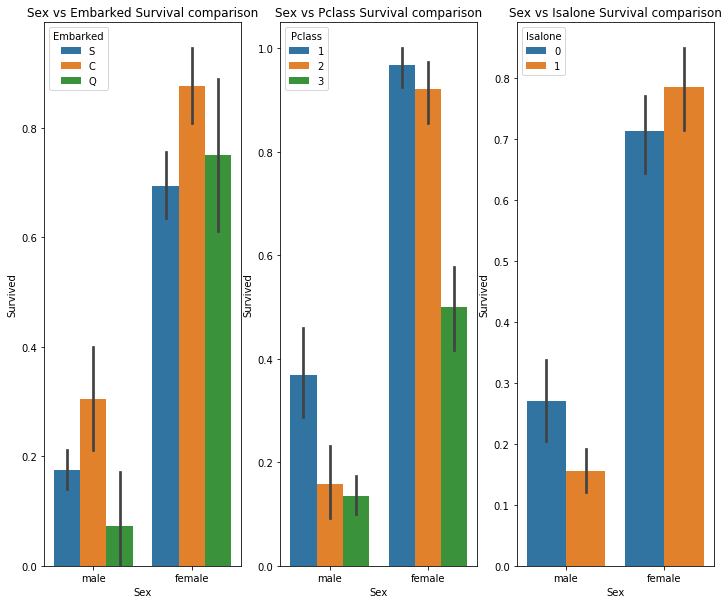

In [212]:
fig, axis = plt.subplots(1, 3, figsize = (12, 10))

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data = data1, ax = axis[0])
axis[0].set_title('Sex vs Embarked Survival comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = data1, ax = axis[1])
axis[1].set_title('Sex vs Pclass Survival comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'Isalone', data = data1, ax = axis[2])
axis[2].set_title('Sex vs Isalone Survival comparison')

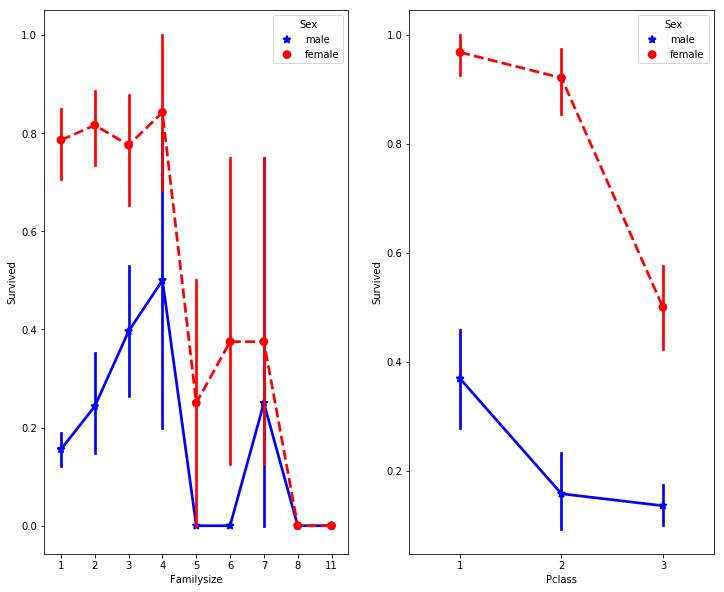

In [216]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize = (12, 10))

sns.pointplot(x = 'Familysize', y = 'Survived', hue = 'Sex', data = data1,
             palette = {'male': 'blue', 'female': 'red'},
             markers = ['*', 'o'], linestyles = ['-', '--'], ax = maxis1)

sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = data1,
             palette = {'male': 'blue', 'female': 'red'},
             markers = ['*', 'o'], linestyles = ['-', '--'], ax = maxis2)

C:\Users\control\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


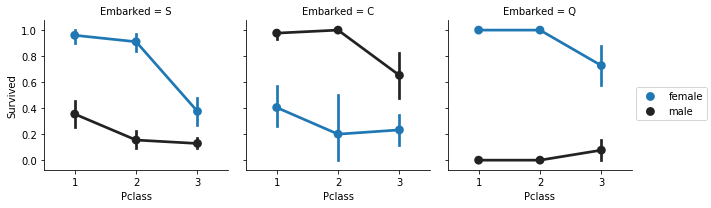

In [237]:
g = sns.FacetGrid(data1, col = 'Embarked')
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order = [1, 2, 3])
g.add_legend()

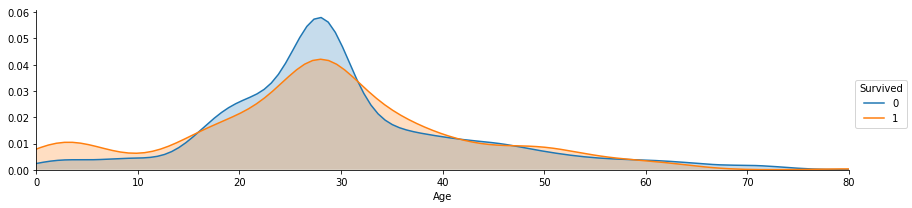

In [241]:
a = sns.FacetGrid(data1, hue = 'Survived', aspect = 4)  #aspect 图表长宽比
a.map(sns.kdeplot, 'Age', shade = True) #shade 线段下的阴影
a.set(xlim = (0, data1.Age.max()))
a.add_legend()

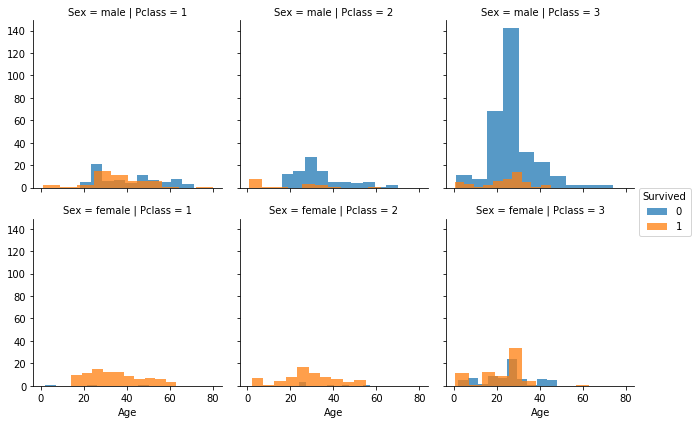

In [272]:
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)   #alpha 透明度
h.add_legend()

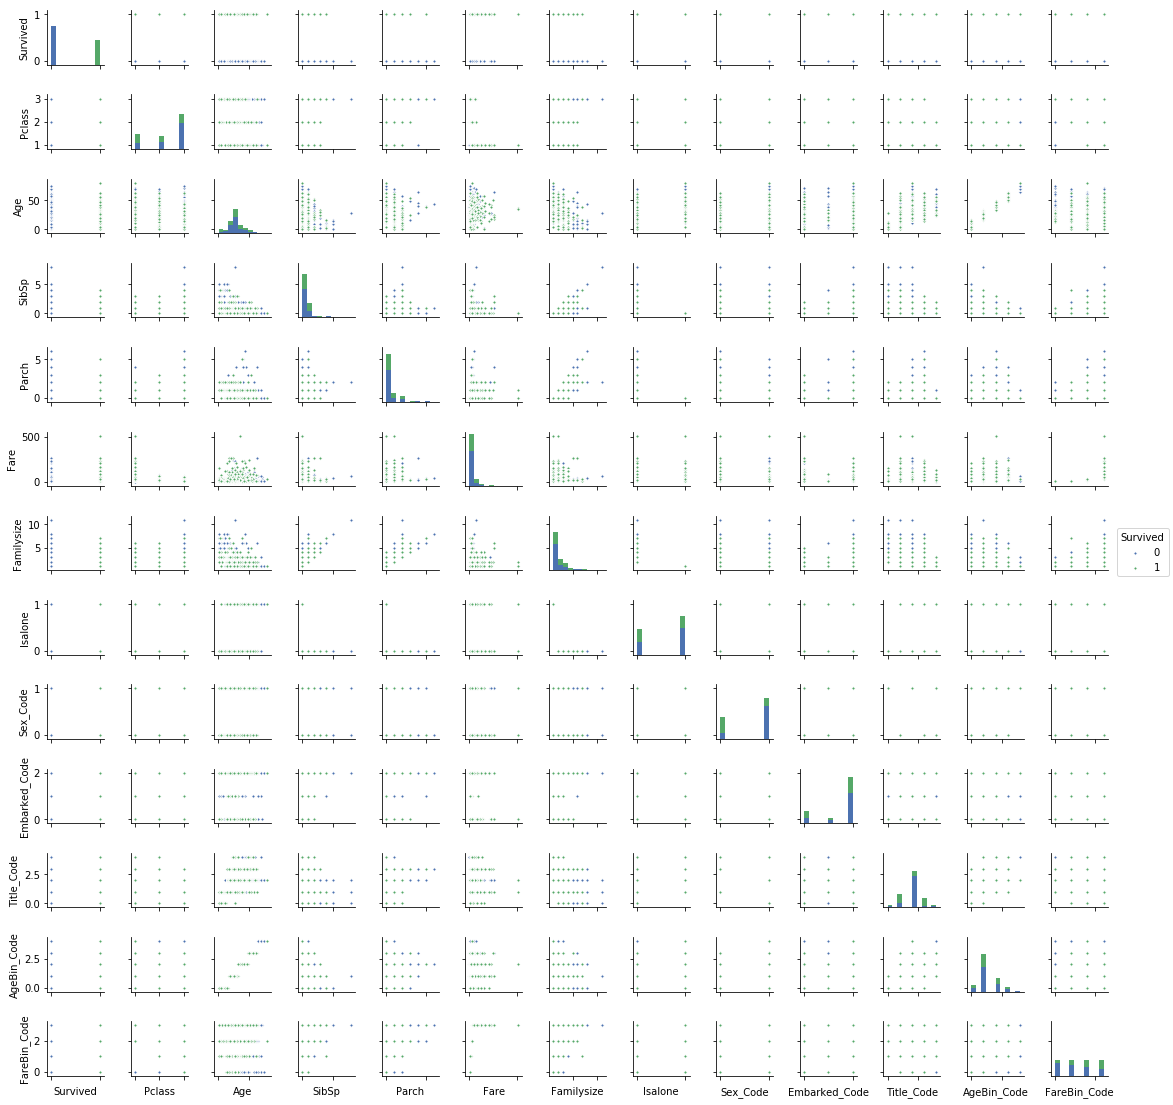

In [275]:
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'hist', plot_kws=dict(s=10) )
pp.set(xticklabels=[])

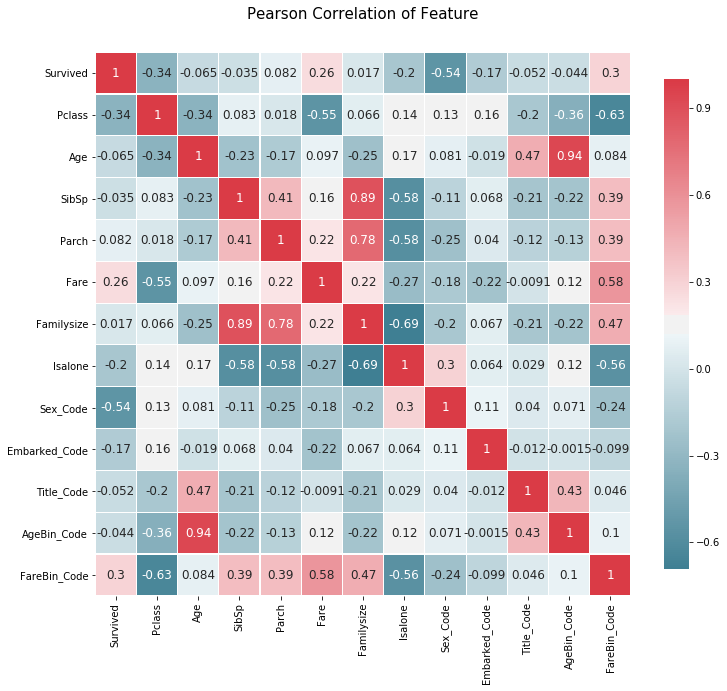

In [293]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize = (12, 10))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    #seaborn.diverging_palette(h_neg, h_pos, s=75, l=50, sep=10, n=6, center='light', as_cmap=False)
    #创建一个定制的色板 h_neg[0,359], h_pos[0,359], s[0,100],l[0,100],n[int],center['light', 'dark'], as_cmap =False时，返回一串颜色，True时返回映射对象
    
    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,  #使用上面订制的色板
        square = False, #每个cell为正方形相等大小，不过FALSE和True感觉没变化
        cbar_kws = {'shrink': .9},   #轴心设置 传入字典
        ax = ax,
        annot = True, #True 标出cell的数值
        linewidths = 0.1, vmax = 1, linecolor = 'white',   #vmax定义colormap中每个数值代表的深浅色度
        annot_kws = {'fontsize': 12}   #当annot为True时，设置数值大小  传入字典
    )
    
    plt.title('Pearson Correlation of Feature', y = 1.05, size = 15)
    
correlation_heatmap(data1)

In [11]:
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]

In [14]:
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .6, random_state = 0)
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA_predict = data1[Target]

row_index = 0

#compare each algorithm
for alg in MLA:
    
    #get the name of class. such as AdaBoostClassifier(....) is a function, there are many variables in the function
    #And .__class__.name can just get the name of the function. here is AdaBoostClassifier
    MLA_name = alg.__class__.__name__   
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Paremeters'] = str(alg.get_params())

AdaBoostClassifier
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
BaggingClassifier
BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
         verbose=0, warm_start=False)
ExtraTreesClassifier
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
GradientBoostingClassifier
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_featur

In [21]:
alg.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': True,
 'subsample': 1}

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)